In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
plt.style.use('./graph_preset.mplstyle')

import h5py

import json

#from datetime import datetime, timedelta
#from glob import glob

### １．データの読み込み

In [2]:
run_dir = Path("../runs")
read_paths = natsorted(run_dir.glob("*.h5"))

for idx, read_path in enumerate(read_paths, start=0):
    run_name = Path(read_path).name   # e.g. 250526105004.h5
    print(f"{idx}: {run_name}")

0: 250526105004.h5
1: 250526105046.h5
2: 250526110605.h5
3: 250526110735.h5
4: 250527184514.h5
5: 250527185245.h5
6: 250529112106.h5
7: 250609130638.h5
8: 250609130745.h5
9: 250609131245.h5
10: 250609131656.h5
11: 250609131712.h5
12: 250609131905.h5
13: 250609132303.h5
14: 250609132425.h5
15: 250609132510.h5
16: 250609133645.h5
17: 250609133722.h5
18: 250609133840.h5
19: 250609134312.h5
20: 250609134343.h5
21: 250609134353.h5
22: 250609134458.h5
23: 250609155121.h5
24: 250609155138.h5
25: 250617103722.h5
26: 250617103816.h5
27: 250617104031.h5
28: 250617104136.h5
29: 250617104309.h5
30: 250724115358.h5
31: 250724134110.h5
32: 250724141708.h5
33: 250724141727.h5
34: 250724141902.h5
35: 250724145926.h5
36: 250724160910.h5
37: 250724160927.h5
38: 250724161003.h5
39: 250724161048.h5
40: 250724161115.h5
41: 250724161206.h5
42: 250724161249.h5
43: 250724161309.h5
44: 250724161348.h5
45: 250724161638.h5
46: 250724161803.h5
47: 250724161842.h5
48: 250724162229.h5
49: 250724162432.h5
50: 250725

### ２．データの選択

In [3]:
with h5py.File(read_paths[94], "r") as f: # read_paths[#] that you want to read
    arr = f["log"][:]


df_data = pd.DataFrame(arr, columns=["rel_time", "com", "vel","pow"])
df_data

,rel_time,com,vel,pow
0,0.12499,0.0,0.199219,0.415753
1,0.24999,0.0,0.199219,0.415794
2,0.37499,0.0,0.199219,0.415791
3,0.49999,0.0,0.199219,0.415748
4,0.62499,0.0,0.199219,0.415764
5,0.74999,0.0,0.203125,0.415843
6,0.87499,0.0,0.199219,0.415757
7,0.99999,0.0,0.199219,0.415660
8,1.12499,0.0,0.199219,0.415736
9,1.24999,0.0,0.199219,0.415746


### ３．プロット

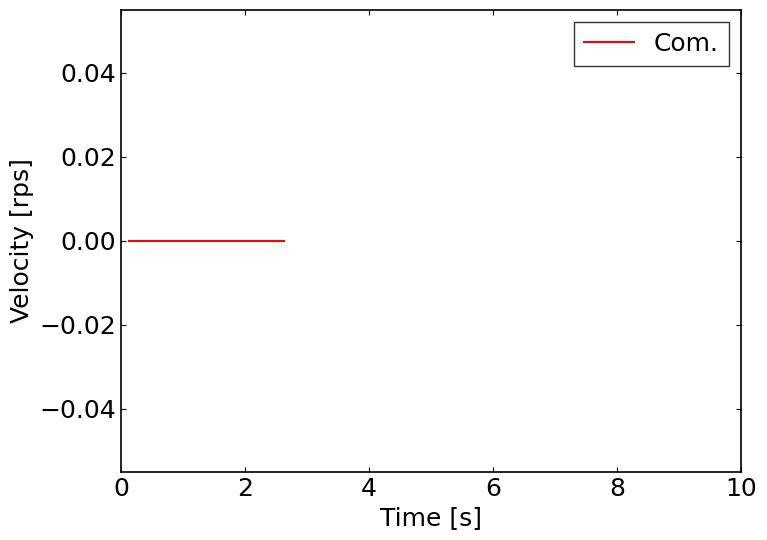

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(df_data["rel_time"], df_data["com"], label="Com.", color="red")
#ax.plot(df_data["rel_time"], df_data["vel"], label="Vel.", color="blue")

ax.set_xlim(0,10)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.legend()

In [10]:
# hdf2csv
csv_path = read_paths[3].with_suffix(".csv")  # Change index as needed
df_data.to_csv(csv_path, index=False)
print(f"Data saved to {csv_path}")

Data saved to ..\runs\250526110735.csv
